<div class="alert alert-block alert-warning">
<h1 style="font-size: 30px;font-weight:bold ">World Happiness Report 2023: Key Predictors of Happiness</h1>

* Dataset sources:
    * 1. https://worldhappiness.report/ed/2023/#appendices-and-data
    * 2. https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors?select=WHR_2023.csv
</div>

# 1. Importing the libraries

In [21]:
# Importing essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# For Data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# To create subplots
from plotly.subplots import make_subplots

# 2 . Loading the essential datasets

## 2.1 Loading the main dataset

In [22]:
# Loading the main dataset
whr23_df = pd.read_csv('WHR2023.csv')  # Read the CSV file
whr23_df.head()  # Display the first few rows of the DataFrame

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [23]:
whr23_df.shape  # Shape of the dataset

(137, 19)

## 2.2 Loading the auxiliary dataset

In [24]:
# Loading the auxiliary dataset
kagwhr_df=pd.read_csv('WHR2023_kag.csv')  # Read the CSV file
kagwhr_df.head()  # Display the first few rows of the DataFrame

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [25]:
kagwhr_df.shape  # Shape of the dataframe

(137, 9)

# 3. Preprocessing

## 3.1 Rank the countries by ladder scores

In [26]:
whr23_df['Rank'] = whr23_df['Ladder score'].rank(ascending=False, method='min')  # Rank the countries based on their ladder score in descending order
whr23_df['Rank'] = whr23_df['Rank'].astype(int)  # Convert the 'Rank' column to dtype integer
whr23_df.insert(1, 'Rank', whr23_df.pop('Rank'))  # Insert the 'Rank' column at index 1
whr23_df.head()  # Display the updated DataFrame

,Country name,Rank,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,1,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,2,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,3,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,4,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,5,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


## 3.2 Mapping regions from the auxiliary dataset to the main dataset

In [27]:
whr23_df['Region'] = whr23_df['Country name'].map(kagwhr_df.set_index('country')['region'])  # Mapping the 'Region' to each country in the 'whr23_df' DataFrame based on the 'Country name'
whr23_df.insert(1, 'Region', whr23_df.pop('Region'))  # Inserting the 'Region' column at index 1
whr23_df.head()  # Display the updated DataFrame

,Country name,Region,Rank,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Western Europe,2,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Western Europe,3,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Middle East and North Africa,4,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Western Europe,5,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [28]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
whr23_df.head()

,Country name,Region,Rank,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,1,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Western Europe,2,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Western Europe,3,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Middle East and North Africa,4,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Western Europe,5,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [29]:
# Loop through the columns of the "whr23_df" DataFrame to get the index and col names
for idx, col in enumerate(whr23_df.columns):
    print(f'Index {idx}: {col}')  # Print the index and column name

Index 0: Country name
Index 1: Region
Index 2: Rank
Index 3: Ladder score
Index 4: Standard error of ladder score
Index 5: upperwhisker
Index 6: lowerwhisker
Index 7: Logged GDP per capita
Index 8: Social support
Index 9: Healthy life expectancy
Index 10: Freedom to make life choices
Index 11: Generosity
Index 12: Perceptions of corruption
Index 13: Ladder score in Dystopia
Index 14: Explained by: Log GDP per capita
Index 15: Explained by: Social support
Index 16: Explained by: Healthy life expectancy
Index 17: Explained by: Freedom to make life choices
Index 18: Explained by: Generosity
Index 19: Explained by: Perceptions of corruption
Index 20: Dystopia + residual


## 3.3 Dropping unnecessary columns

In [30]:
# Dropping unnecessary columns inplace
whr23_df.drop(whr23_df.columns[[4,5,6,13,14,15,16,17,18,19,20]], axis=1, inplace=True)
whr23_df.head()

,Country name,Region,Rank,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,Western Europe,2,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,Western Europe,3,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,Middle East and North Africa,4,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,Western Europe,5,7.403,10.942,0.930,71.550,0.887,0.213,0.379


## 3.4 Calculating GDP per capita
    * GDP per capita is presumed to be in USD

In [31]:
whr23_df['GDP per capita'] = np.exp(whr23_df['Logged GDP per capita'])  # Calculate the actual 'GDP per capita' by exponentiating the 'Logged GDP per capita'
whr23_df.insert(4, 'GDP per capita', whr23_df.pop('GDP per capita'))  # Insert the 'GDP per capita' column at index 4
whr23_df.drop('Logged GDP per capita', axis=1, inplace=True)  # Drop the 'Logged GDP per capita' column
whr23_df.head()

,Country name,Region,Rank,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.804,48630.199218,0.969,71.150,0.961,-0.019,0.182
1,Denmark,Western Europe,2,7.586,57641.611054,0.954,71.250,0.934,0.134,0.196
2,Iceland,Western Europe,3,7.530,53960.091175,0.983,72.050,0.936,0.211,0.668
3,Israel,Middle East and North Africa,4,7.473,41731.019327,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,Western Europe,5,7.403,56500.230682,0.930,71.550,0.887,0.213,0.379


In [32]:
whr23_df['GDP per capita'] = whr23_df['GDP per capita'].round(2)  # Round the values in "GDP per capita" to 2 decimal places
whr23_df.head()

,Country name,Region,Rank,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.804,48630.20,0.969,71.150,0.961,-0.019,0.182
1,Denmark,Western Europe,2,7.586,57641.61,0.954,71.250,0.934,0.134,0.196
2,Iceland,Western Europe,3,7.530,53960.09,0.983,72.050,0.936,0.211,0.668
3,Israel,Middle East and North Africa,4,7.473,41731.02,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,Western Europe,5,7.403,56500.23,0.930,71.550,0.887,0.213,0.379


## 3.5 Renaming the columns

In [33]:
# Renaming columns inplace for better readability
whr23_df.rename(columns={
    'Country name' : 'Country',  # Renaming the column "Country name" to "Country"
    'Ladder score' : 'Happiness Score',  # Renaming the column "Ladder score" to "Happiness Score"
    'GDP per capita' : 'GDP per capita (USD)',  # Renaming the column "GDP per capita" to "GDP per capita (USD)"
    'Healthy life expectancy' : 'Life Expectancy (Years)'  # Renaming the column "Healthy life expectancy" to "Life Expectancy (Years)"
}, inplace=True)

whr23_df.head()

,Country,Region,Rank,Happiness Score,GDP per capita (USD),Social support,Life Expectancy (Years),Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.804,48630.20,0.969,71.150,0.961,-0.019,0.182
1,Denmark,Western Europe,2,7.586,57641.61,0.954,71.250,0.934,0.134,0.196
2,Iceland,Western Europe,3,7.530,53960.09,0.983,72.050,0.936,0.211,0.668
3,Israel,Middle East and North Africa,4,7.473,41731.02,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,Western Europe,5,7.403,56500.23,0.930,71.550,0.887,0.213,0.379


In [34]:
whr23_df.shape  # Display the shape of the dataframe

(137, 10)

In [35]:
whr23_df.isna().sum()  # Check for null values

Country                         0
Region                          0
Rank                            0
Happiness Score                 0
GDP per capita (USD)            0
Social support                  0
Life Expectancy (Years)         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [36]:
country_names = whr23_df[['Country', 'Rank']]  # Create a new DataFrame with the "Country" and "Rank" columns
print(country_names)

                       Country  Rank
0                      Finland     1
1                      Denmark     2
2                      Iceland     3
3                       Israel     4
4                  Netherlands     5
5                       Sweden     6
6                       Norway     7
7                  Switzerland     8
8                   Luxembourg     9
9                  New Zealand    10
10                     Austria    11
11                   Australia    12
12                      Canada    13
13                     Ireland    14
14               United States    15
15                     Germany    16
16                     Belgium    17
17                     Czechia    18
18              United Kingdom    19
19                   Lithuania    20
20                      France    21
21                    Slovenia    22
22                  Costa Rica    23
23                     Romania    24
24                   Singapore    25
25        United Arab Emirates    26
2

# 4 Visualizations

## 4.1 Visualization 1: Chloropleth map for an overview of happiness score around the world

In [37]:
# Creating a choropleth map using Plotly Express to visualize Happiness Scores by Country
fig = px.choropleth(whr23_df,
                    locations='Country',  # Column containing country names
                    locationmode='country names',  # Set the location mode
                    color='Happiness Score',  # Column containing happiness scores
                    hover_name='Country',  # Column to display on hover
                    color_continuous_scale='turbo_r',  # Color scale
                    title='Happiness Scores by Country (2023)'  # Title
                    )

# Update layout for better visualization
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=1000,  # Set the height of the plot
    title_x = 0.45,  # Center the title horizontally
    title_y=0.75,  # Center the title vertically
    coloraxis_colorbar=dict(  # Customize the colorbar
        tickmode='linear',  # Set tick mode to linear
        tickvals=[min(whr23_df['Happiness Score']), max(whr23_df['Happiness Score'])],  # Set tick values to min and max happiness scores
        len=0.43,  # Set the length of the colorbar
        thicknessmode='pixels',  # Set the thickness mode to pixels
        thickness=30,  # Set the thickness of the colorbar
    ),
    margin=dict(t=10,b=10,l=10,r=10)  # Set the margins of the plot for a compact layout
)

fig.show()  # Display the plot

## 4.2 Visualization 2: Bar chart of average happiness and average life expectancy by region

In [38]:
# Calculate average values for "Happiness Score" and "Life Expectancy" per region and round to 2 decimals
region_avg_df = whr23_df.groupby('Region').agg({  # Groupby "Region" and calculate the mean
    'Happiness Score': 'mean',  # Calculate the mean of "Happiness Score"
    'Life Expectancy (Years)': 'mean'  # Calculate the mean of "Life Expectancy (Years)"
}).reset_index()  # Reset the index

# Round the averages to 2 decimal places
region_avg_df['Happiness Score'] = region_avg_df['Happiness Score'].round(2)
region_avg_df['Life Expectancy (Years)'] = region_avg_df['Life Expectancy (Years)'].round(2)

# Create subplots
fig = make_subplots(
    rows=1, cols=2,  # Create a 1x2 grid of subplots
    subplot_titles=("Average Happiness Score by Region", "Average Life Expectancy by Region"),  # Set subplot titles
    vertical_spacing=0.1,  # Adjust spacing between subplots
    shared_yaxes=True  # Share the y-axis (Region) between subplots
)

# Add bar chart for Average Happiness Score by Region (left subplot)
fig.add_trace(go.Bar(
    y=region_avg_df['Region'],  # Region names on the y-axis
    x=region_avg_df['Happiness Score'],  # Average happiness score on the x-axis
    name="Happiness Score",  # Name of the trace
    orientation='h',  # Horizontal bars
    text=region_avg_df['Happiness Score'],  # Display average happiness score on bars
    textposition='inside',  # Position the text outside the bars
), row=1, col=1)

# Add bar chart for Average Life Expectancy by Region (right subplot)
fig.add_trace(go.Bar(
    y=region_avg_df['Region'],  # Region names on the y-axis
    x=region_avg_df['Life Expectancy (Years)'],  # Average life expectancy on the x-axis
    name="Life Expectancy",  # Name of the trace
    orientation='h',  # Horizontal bars
    text=region_avg_df['Life Expectancy (Years)'],  # Display life expectancy on bars
    textposition='inside',  # Position the text outside the bars
    textfont=dict(color='white')  # Set text color to white for better visibility
), row=1, col=2)

# Update layout with titles and labels
fig.update_layout(
    height=600,  # Set the height of the figure
    width=1000,  # Set the width of the figure
    title="Average Happiness and Life Expectancy by Region",  # Set the title
    title_x=0.5,  # Center the title
    template="plotly_white",  # Set the template
    showlegend=True,  # Show legend
    xaxis=dict(
        title="Average Happiness Score",  # X-axis title for the first subplot
        domain=[0, 0.45]  # Adjust the range for the first subplot's x-axis
    ),
    xaxis2=dict(
        title="Average Life Expectancy (Years)",  # X-axis title for the second subplot
        domain=[0.55, 1]  # Adjust the range for the second subplot's x-axis
    ),
    yaxis=dict(
        title="Region" # Shared Y-axis title
    ),
)

fig.show()  # Display the figure


## 4.3  Visualization 3: Scatter plot of corruption vs happiness with GDP per capita in USD

In [39]:
# Create a scatter plot using Plotly Express to visualize the relationship between Happiness Score, Perceptions of Corruption, and GDP per capita
fig = px.scatter(whr23_df,
                 x="Happiness Score",    # X-axis: Happiness Score
                 y="Perceptions of corruption",         # Y-axis: Life Expectancy
                 size="GDP per capita (USD)",   # Bubble size: GDP per capita
                 color="Region",              # Bubble color: Region
                 hover_name="Country",        # Display country names on hover
                 title="Perceptions of Corruption vs Happiness with GDP per capita (USD)",  # Title
                 labels={"GDP per capita (USD)": "GDP per capita (USD)",  # Label for GDP per capita
                         "Happiness Score": "Happiness Score",  # Label for Happiness Score
                         "Perceptions of corruption": "Perceptions of Corruption"},  # Label for Perceptions of Corruption
                 template="plotly_white"      # For a clean, simple layout
                )

# # Update layout with annotations
fig.update_layout(
    annotations=[  # Add an annotation about bubble size
        dict(
            x=1,  # Adjust the horizontal position of the note
            y=0.05,  # Adjust the vertical position of the note
            xref="paper",  # Reference the paper size
            yref="paper",  # Reference the paper size
            text="*Bubble size corresponds to GDP per capita (USD)",  # Note about bubble size
            showarrow=False,  # No arrow
            font=dict(size=12, color="black"),  # Font settings for the note
            align="center"  # Center the note horizontally
        )
    ]
)

fig.show()  # Display the plot


## 4.4 Visualization 4: Regression plot between social support and happiness score by region

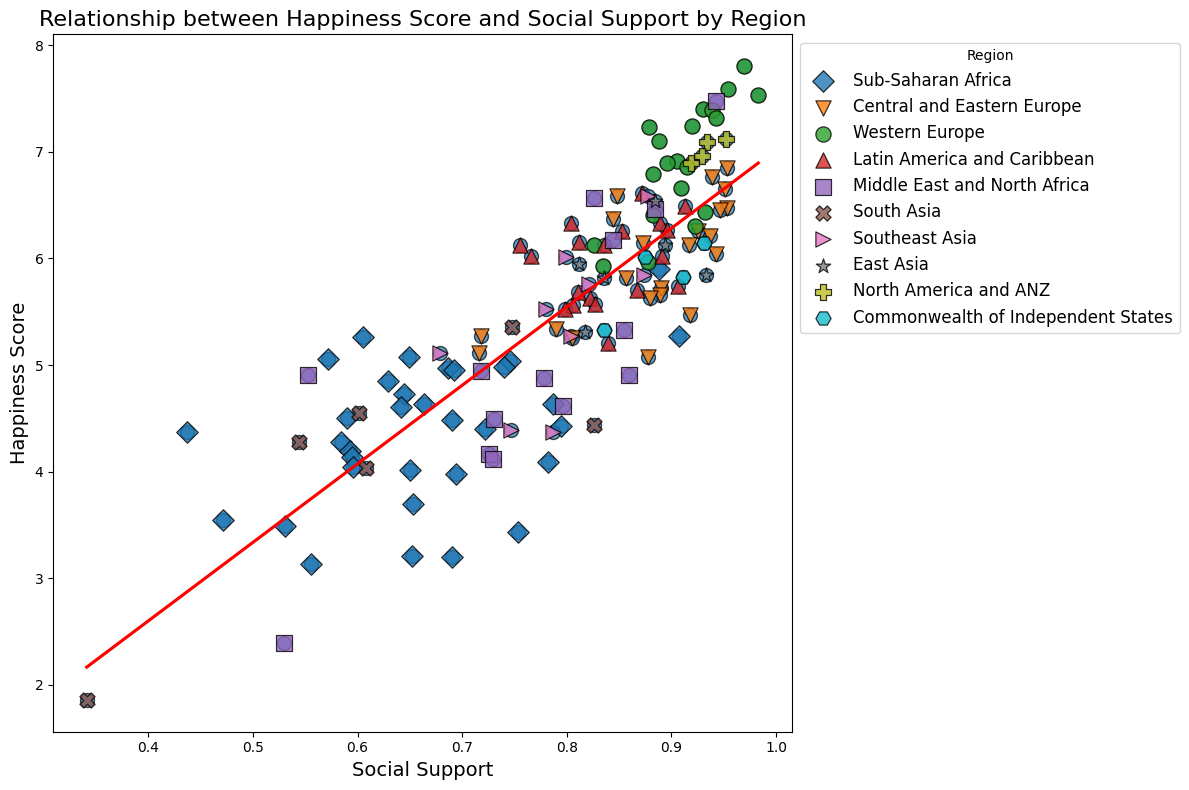

In [40]:
# Define a custom marker for each region
marker_styles = {
    'Sub-Saharan Africa': 'D',  # Diamond
    'Central and Eastern Europe': 'v',  # Triangle Down
    'Western Europe': 'o',  # Circle
    'Latin America and Caribbean': '^',  # Triangle Up
    'Middle East and North Africa': 's',  # Square
    'South Asia': 'X',  # Cross
    'Southeast Asia': '>',  # Triangle Right
    'East Asia': '*',  # Star
    'North America and ANZ': 'P',  # Pentagon
    'Commonwealth of Independent States': 'H'  # Hexagon
}

# Create the plot
plt.figure(figsize=(12, 8))  # Figure size of 12x8 inches

# Plot Happiness Score vs Social Support with a regression line
sns.regplot(x='Social support', y='Happiness Score', data=whr23_df,
            scatter_kws={'s': 100, 'edgecolor': 'black', 'alpha': 0.7},  # Increase marker size and edge color
            line_kws={'color': 'red'},  # Set the regression line color to red
            ci=None,  # Remove confidence interval
            fit_reg=True)  # Show the regression line

# Plot regions separately with different markers
for region, marker in marker_styles.items():  # Iterate over regions and markers
    region_data = whr23_df[whr23_df['Region'] == region]  # Filter data for the current region
    sns.scatterplot(x='Social support', y='Happiness Score', data=region_data,  # Plot the data for the current region
                    label=region, marker=marker,  # Set the marker style and label
                    s=120,  # Set the marker size
                    edgecolor='black',  # Set the edge color
                    alpha=0.8)  # Set the transparency


# Adding labels and title
plt.title('Relationship between Happiness Score and Social Support by Region', fontsize=16)
plt.xlabel('Social Support', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)

# Improve the legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the plot with appropriate layout
plt.tight_layout()

# Display the plot
plt.show()
